## 非平衡数据集

当遇到非平衡数据集时，可能需要校准了。如 prior-correction 和 weighting 了。


实验说明，在下面的数据集中；原始的全量数据集的正负样本比例是 9:1。进行抽样完成后的正负样本比例为, 1:1;

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [364]:
countOne = 0
countZero = 0
fullset = []
probs = []
for i in range(10000):
    x = np.random.randn() # 正态分布, μ = 0, ẟ = 1
    p = 1 / (1 + np.exp(-(2 * x - 3.35)))
#     p = 1 / (1 + np.exp(-x))
    y = np.random.binomial(1, p) # Binomial 分布，概率为 p
    if y == 1:
        countOne += 1
    else:
        countZero += 1
    fullset.append([x, y])
    probs.append(p)

subset = []
for (x, y) in fullset:
    if y == 1 or (y == 0 and np.random.uniform() < 1/9):
        subset.append([x, y])
#         print(x, y)

full_df = pd.DataFrame(fullset, columns=['x', 'y'])
sub_df = pd.DataFrame(subset, columns=['x', 'y'])

In [365]:
data = np.array(fullset)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   3.,   1.,   5.,  13.,  11.,
         27.,  37.,  62.,  83., 123., 147., 222., 255., 373., 401., 479.,
        582., 593., 654., 704., 687., 667., 654., 586., 521., 475., 391.,
        321., 288., 190., 125., 108.,  74.,  48.,  31.,  21.,  12.,  10.,
          8.,   3.,   2.,   1.,   0.,   1.]),
 array([-4.55736513, -4.38467474, -4.21198435, -4.03929396, -3.86660357,
        -3.69391318, -3.52122279, -3.3485324 , -3.17584201, -3.00315162,
        -2.83046123, -2.65777084, -2.48508045, -2.31239006, -2.13969967,
        -1.96700928, -1.79431889, -1.6216285 , -1.44893811, -1.27624772,
        -1.10355733, -0.93086694, -0.75817655, -0.58548616, -0.41279577,
        -0.24010538, -0.06741499,  0.1052754 ,  0.27796579,  0.45065618,
         0.62334657,  0.79603696,  0.96872735,  1.14141774,  1.31410813,
         1.48679852,  1.65948891,  1.8321793 ,  2.00486969,  2.17756008,
         2.35025047,  2.52294086,  2.69563125,  2.86832164,  3.04101203,
 

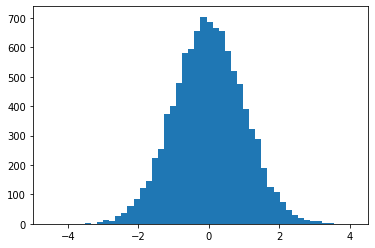

In [366]:
plt.hist(data[:,0], 50)

(array([3.927e+03, 1.446e+03, 8.300e+02, 5.760e+02, 4.160e+02, 3.410e+02,
        2.610e+02, 2.060e+02, 2.120e+02, 1.710e+02, 1.470e+02, 1.270e+02,
        1.080e+02, 1.000e+02, 7.600e+01, 9.200e+01, 8.200e+01, 8.100e+01,
        7.400e+01, 6.200e+01, 6.100e+01, 4.900e+01, 5.000e+01, 3.700e+01,
        2.500e+01, 3.100e+01, 3.900e+01, 2.400e+01, 2.800e+01, 2.800e+01,
        2.800e+01, 2.800e+01, 2.200e+01, 2.200e+01, 1.900e+01, 1.800e+01,
        2.300e+01, 1.900e+01, 7.000e+00, 1.800e+01, 1.700e+01, 9.000e+00,
        1.100e+01, 5.000e+00, 1.500e+01, 6.000e+00, 6.000e+00, 1.100e+01,
        6.000e+00, 3.000e+00]),
 array([3.86042173e-06, 1.98412280e-02, 3.96785955e-02, 5.95159631e-02,
        7.93533307e-02, 9.91906982e-02, 1.19028066e-01, 1.38865433e-01,
        1.58702801e-01, 1.78540168e-01, 1.98377536e-01, 2.18214904e-01,
        2.38052271e-01, 2.57889639e-01, 2.77727006e-01, 2.97564374e-01,
        3.17401741e-01, 3.37239109e-01, 3.57076476e-01, 3.76913844e-01,
        3.967512

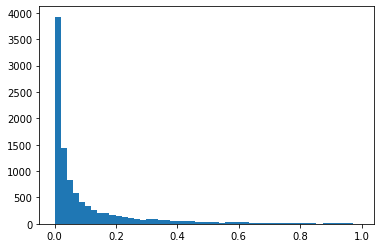

In [367]:
plt.hist(probs, 50)

In [368]:
full_df.describe()

,x,y
count,10000.000000,10000.000000
mean,-0.008182,0.102000
std,0.992733,0.302663
min,-4.557365,0.000000
25%,-0.679456,0.000000
50%,-0.012925,0.000000
75%,0.661639,0.000000
max,4.077154,1.000000


In [369]:
full_df['y'].value_counts(normalize=True)

0    0.898
1    0.102
Name: y, dtype: float64

(array([8980.,    0., 1020.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

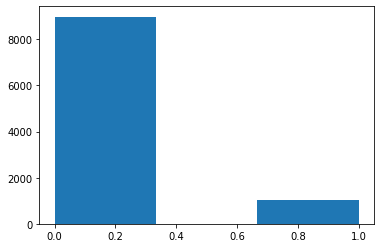

In [370]:
plt.hist(full_df['y'].values, 3)

In [371]:
sub_df.describe()

,x,y
count,2041.000000,2041.000000
mean,0.552198,0.499755
std,1.090830,0.500122
min,-3.425755,0.000000
25%,-0.184399,0.000000
50%,0.613822,0.000000
75%,1.354467,1.000000
max,4.077154,1.000000


In [372]:
sub_df['y'].value_counts(normalize=True)

0    0.500245
1    0.499755
Name: y, dtype: float64

(array([1021.,    0., 1020.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

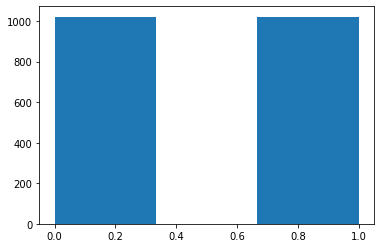

In [373]:
plt.hist(sub_df['y'], 3)

### 在 1:1 的抽样数据上训练


In [375]:
from sklearn.linear_model import LogisticRegression

In [376]:
X = sub_df['x'].values.reshape(-1,1)
y = sub_df['y'].values
lr = LogisticRegression(class_weight=None,solver='lbfgs').fit(X, y)
print("coef:", lr.coef_)
print("interpret:", lr.intercept_)

coef: [[1.87829335]]
interpret: [-1.09440089]


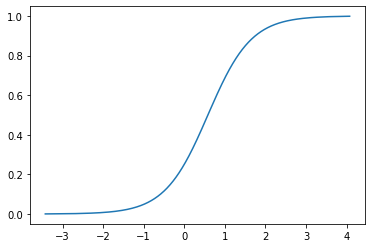

In [377]:
X.sort(axis=0)
sub_X = X
sub_y_pred = lr.predict_proba(X)
plt.plot(sub_X[:,0], sub_y_pred[:,1])

### prior-correction

利用先验数据集信息来调整 intercept.

当我们知道总体的先验分布 $\pi$ 时，总体上的intercept $\beta_0^*$，可以通过采样后(case-control)的 intercept $\hat{\beta_0}$ 来估计：

$$
\beta_0^* = \hat{\beta_0} - log\big(\frac{1- \pi}{\pi}\cdot \frac{n_1}{n_0}\big)
$$
- $n_0, n_1$ 是相应的采样数。

参考[3]


In [378]:
p1 = full_df['y'].value_counts(normalize=True)[1] # 原始数据集的先验概率
r1 = sub_df['y'].value_counts(normalize=True)[0] # 采样后数据集的先验概率
de = r1 * (1 - p1)
no = (1-r1) * p1
off = np.log(de/no)
lr.intercept_ -= off

coef: [[1.87829335]]
interpret: [-3.27057806]


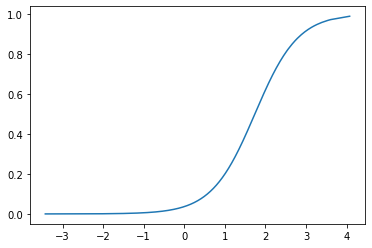

In [379]:
print("coef:", lr.coef_)
print("interpret:", lr.intercept_)
sub_y_pred_adjusted = lr.predict_proba(X)
plt.plot(sub_X[:,0], sub_y_pred_adjusted[:,1])

### 在 1:9 的原始数据上训练

In [380]:
X = full_df['x'].values.reshape(-1,1)
y = full_df['y'].values
lr =  LogisticRegression(class_weight=None,solver='lbfgs').fit(X, y)
print("coef:", lr.coef_)
print("interpret:", lr.intercept_)

coef: [[1.90938504]]
interpret: [-3.26762017]


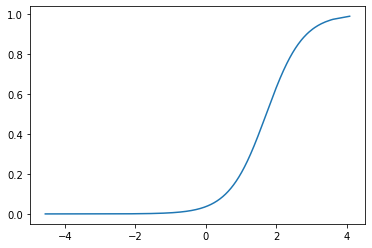

In [381]:
X.sort(axis=0)
full_y_pred = lr.predict_proba(X)
full_X = X
plt.plot(full_X[:,0], full_y_pred[:,1])

可以看到原始数据与抽样数据集上训练的参数是一样的，但是 intercept/bias 是不一样的。这就需要我们来修正。

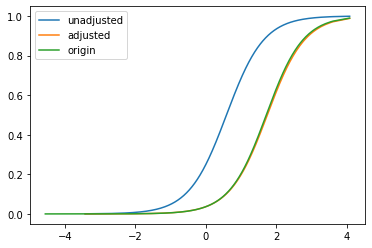

In [382]:
plt.plot(sub_X[:,0], sub_y_pred[:,1], label='unadjusted')
plt.plot(sub_X[:,0], sub_y_pred_adjusted[:,1], label='adjusted')
plt.plot(full_X[:,0], full_y_pred[:,1], label='origin')
plt.legend()

### weighting

怎样使用 weighting 那？



### 最好的解释

1. [Logistic-Regression: Prior correction at test time](https://stats.stackexchange.com/questions/117592/logistic-regression-prior-correction-at-test-time)
2. [Usage Note 22601: Adjusting for oversampling the event level in a binary logistic model](http://support.sas.com/kb/22/601.html)
3. [Does down-sampling change logistic regression coefficients?](https://stats.stackexchange.com/questions/67903/does-down-sampling-change-logistic-regression-coefficients)